# Structure Factor for Hard Spheres

Using Wertheim's exact solution for Percus-Yevick integral equation.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calculate_ck(eta, k):
    common_denom = (1.0 - eta)**4
    alpha = -(1.0 + 2.0 * eta)**2.0 / common_denom
    delta = 6.0 * eta * (1.0 + 0.5 * eta)**2 / common_denom
    gamma = -0.5 * eta * alpha
    
    term1 = 4.0 * math.pi / (k**6)
    term2 = alpha * (k**3) * (np.sin(k) - k * np.cos(k)) - 24.0 * gamma
    term3 = (k**2) * (2.0 * k * np.sin(k) - (k**2 - 2.0) * np.cos(k) - 2.0)
    term4 = (4.0 * k**3 - 24.0 * k) * np.sin(k)
    term5 = (k**4 - 12.0 * k**2 + 24.0) * np.cos(k)

    return term1 * (term2 + delta * term3 - gamma * (term4 - term5))

In [4]:
def calculate_sk(eta, k):
    rho = 6.0 * eta / math.pi
    sk = 1.0 / (1.0 - rho * calculate_ck(eta, k))

    return sk

In [5]:
eta = 0.25 # Volume fraction
set_of_ks = np.linspace(0.01, 41.0, 500)
structure_factor = []

for k in set_of_ks:
    sk = calculate_sk(eta, k)
    
    structure_factor.append(sk)

In [6]:
target0 = np.loadtxt('target.dat', usecols = 0)
target1 = np.loadtxt('target.dat', usecols = 1)

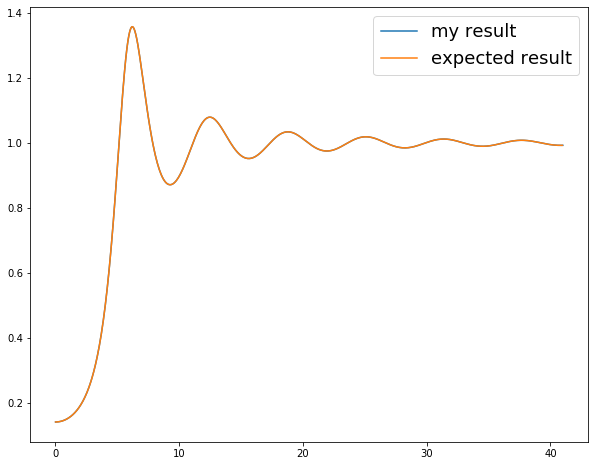

In [7]:
fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 1, 1)
plt.plot(set_of_ks, structure_factor, label = 'my result');
plt.plot(target0, target1, label = 'expected result');
plt.legend(fontsize = 18);

# Scattering functions for the short time

In [27]:
def short_scattering(eta, d0, ks, times):
    grid_time, grid_k = np.meshgrid(times, ks)
    S_k = calculate_sk(eta, grid_k)
    F = S_k * np.exp((-1.0) * (grid_k**2) * d0 * grid_time / S_k)
    F_self = np.exp((-1.0) * (grid_k**2) * d0 * grid_time)
    
    return grid_k, S_k, F, F_self

In [9]:
k = 4.1
D0 = 1.0
time = np.linspace(0.0, 2.0e-1, 25)

In [28]:
new_ks, new_Sk, F, Fs = short_scattering(eta, D0, set_of_ks, time)

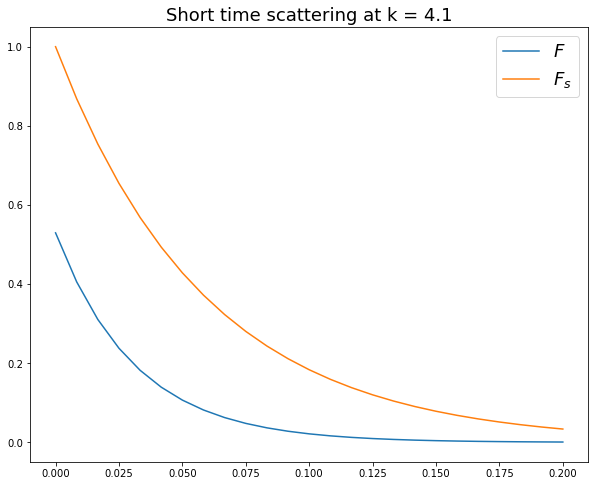

In [29]:
fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 1, 1)
plt.plot(time, F[50], label = r'$F$');
plt.plot(time, Fs[50], label = r'$F_s$');
plt.title("Short time scattering at k = 4.1", size = 18)
plt.legend(fontsize = 18);

# Friction coefficient

In [32]:
def friction(KbT, n, ks, S_k, F, Fs):
    integrand = F * Fs * (ks * (S_k - 1.0) / S_k)**2
    integral = np.sum(integrand, 0)
    
    return KbT * integral / (12.0 * math.pi**2 * n)

In [33]:
KbT = 1.0
n = 1.0

In [34]:
friction_coeff = friction(KbT, n, new_ks, new_Sk, F, Fs)

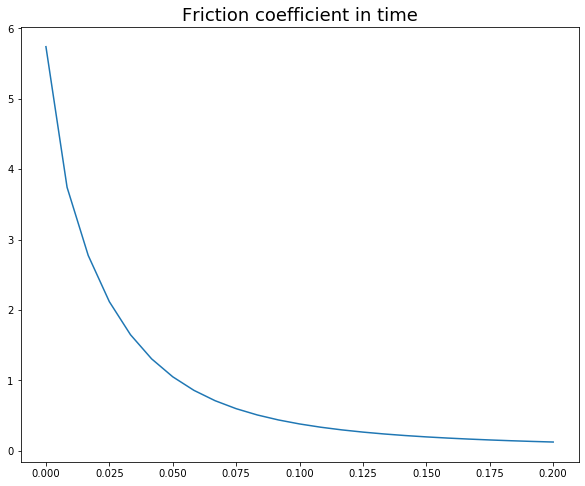

In [36]:
fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 1, 1)
plt.plot(time, friction_coeff);
plt.title("Friction coefficient in time", size = 18);